In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# path = './RESULTS/Results_layers20_mn20_T1000/'
path = './Results/'

## Results for Community Prediction (NMI)

In [2]:
models = ['SEFIR', 'SERNN_GRU', 'SERNN_LSTM']
num_moving_nodes = ['20', '40']

data = list()
for mn in num_moving_nodes:
    nmi_models = list()
    for model in models:
        print('./RESULTS/Results_layers20_mn{}_T1000/NMI_{}.txt'.format(mn, model))
        with open('./RESULTS/Results_layers20_mn{}_T1000/NMI_{}.txt'.format(mn, model)) as f:
            nmi_models.append([float(nmi) for nmi in f.readlines()])
    print(len(nmi_models[0]))
    data.append(nmi_models)

./RESULTS/Results_layers20_mn20_T1000/NMI_SEFIR.txt
./RESULTS/Results_layers20_mn20_T1000/NMI_SERNN_GRU.txt
./RESULTS/Results_layers20_mn20_T1000/NMI_SERNN_LSTM.txt
50
./RESULTS/Results_layers20_mn40_T1000/NMI_SEFIR.txt
./RESULTS/Results_layers20_mn40_T1000/NMI_SERNN_GRU.txt
./RESULTS/Results_layers20_mn40_T1000/NMI_SERNN_LSTM.txt
23


/codetmp/johan/anaconda3/envs/keras/lib/python3.5/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/codetmp/johan/anaconda3/envs/keras/lib/python3.5/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/codetmp/johan/anaconda3/envs/keras/lib/python3.5/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


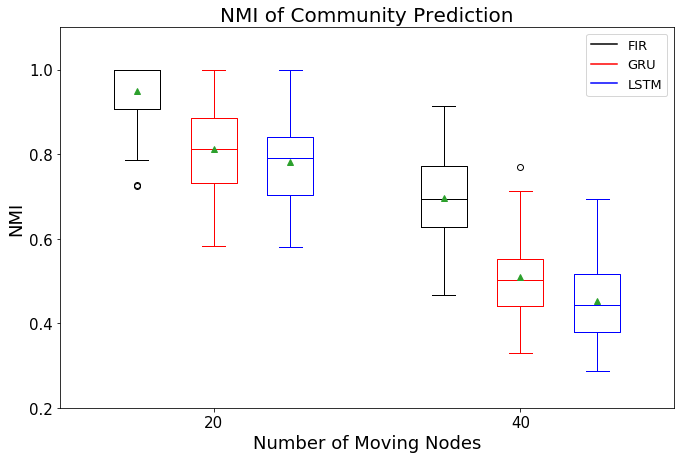

In [3]:
from pylab import plot, show, savefig, xlim, figure, hold, ylim, legend, boxplot, setp, axes

# function for setting the colors of the box plots pairs
def setBoxColors(bp):
    setp(bp['boxes'][0], color='black')
    setp(bp['caps'][0], color='black')
    setp(bp['caps'][1], color='black')
    setp(bp['whiskers'][0], color='black')
    setp(bp['whiskers'][1], color='black')
    setp(bp['fliers'][0], color='black')
    setp(bp['medians'][0], color='black')

    setp(bp['boxes'][1], color='red')
    setp(bp['caps'][2], color='red')
    setp(bp['caps'][3], color='red')
    setp(bp['whiskers'][2], color='red')
    setp(bp['whiskers'][3], color='red')
    setp(bp['fliers'][1], color='red')
    setp(bp['medians'][1], color='red')

    setp(bp['boxes'][2], color='blue')
    setp(bp['caps'][4], color='blue')
    setp(bp['caps'][5], color='blue')
    setp(bp['whiskers'][4], color='blue')
    setp(bp['whiskers'][5], color='blue')
    setp(bp['fliers'][2], color='blue')
    setp(bp['medians'][2], color='blue')

fig = figure(figsize=(11,7))
ax = axes()
hold(True)

# first boxplot pair
for i, d in enumerate(data):
    bp = boxplot(d, positions = [i*4+1, i*4+2, i*4+3], widths = 0.6, showmeans=True)
    setBoxColors(bp)

# second boxplot pair
# bp = boxplot(B, positions = [5, 6, 7], widths = 0.6, showmeans=True)
# setBoxColors(bp)

# thrid boxplot pair
# bp = boxplot(C, positions = [9, 10, 11], widths = 0.6, showmeans=True)
# setBoxColors(bp)

# set axes limits and labels
xlim(0, len(data)*4)
ylim(0.2, 1.1)
ax.set_xticklabels(num_moving_nodes, fontsize=15)
ax.set_xticks(range(2, len(data)*4, 4))
plt.yticks(fontsize=15)

# draw temporary red and blue lines and use them to create a legend
hK, = plot([1,1],'k-')
hR, = plot([1,1],'r-')
hB, = plot([1,1],'b-')
legend((hK, hR, hB),('FIR', 'GRU', 'LSTM'), fontsize=13)
plt.title('NMI of Community Prediction', fontsize=20)
plt.ylabel('NMI', fontsize=18)
plt.xlabel('Number of Moving Nodes', fontsize=18)
hK.set_visible(False)
hR.set_visible(False)
hB.set_visible(False)

# savefig(path+'boxcompare.png')
show()

## Results for Link Prediciton (Precision/Recall)

In [4]:
models = ['SEFIR', 'CN', 'SERNN_GRU', 'SERNN_LSTM']

def text_to_list(str):
#     print(str)
    return [float(i) for i in str[1:-2].split(', ')]

In [5]:
## precision/recall of link prediction by previous network
with open(path+'Precision_all_Previous.txt') as f:
	precision_p = 0
	data = f.readlines()
	for line in data:
		precision_p += float(line)
	precision_p /= len(data)
with open(path+'Recall_all_Previous.txt') as f:
	recall_p = 0
	data = f.readlines()
	for line in data:
		recall_p += float(line)
	recall_p /= len(data)
# print(precision_p)
# print(recall_p)

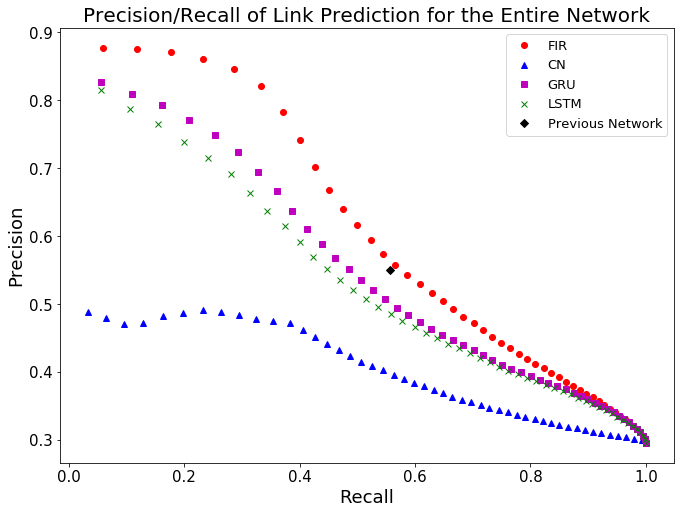

In [6]:
## Plot the results for link prediction (all nodes)
fig = plt.figure(figsize=(11,8))
# ax = fig.add_subplot(111)
# ax.grid()
precision_models, recall_models = list(), list()
legend_label = ['FIR', 'CN', 'GRU', 'LSTM']
fmt = ['ro', 'b^', 'ms', 'gx']
for i, model in enumerate(models):
    with open(path+'Precision_all_{}.txt'.format(model)) as f:
        precision = list()
        data = f.readlines()
        for line in data:
            precision.append(text_to_list(line))
        pre_ = np.array(precision)
#         print(pre_.shape)
        precision_models.append(np.mean(pre_, axis=0, dtype=np.float64))
#     print(precision_models[-1])

    with open(path+'Recall_all_{}.txt'.format(model)) as f:
        recall = list()
        data = f.readlines()
        for line in data:
            recall.append(text_to_list(line))
        rec_ = np.array(recall)
#         print(rec_.shape)
        recall_models.append(np.mean(rec_, axis=0, dtype=np.float64))
#     print(recall_models[-1])

    plt.plot(recall_models[-1], precision_models[-1], fmt[i], label=legend_label[i])

plt.plot(recall_p, precision_p, 'kD', label='Previous Network')
plt.legend(fontsize=13)
plt.title('Precision/Recall of Link Prediction for the Entire Network', fontsize=20)
plt.ylabel('Precision', fontsize=18)
plt.xlabel('Recall', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(path+'link_prediction_all.png')
plt.show()

In [7]:
## precision/recall of link prediction by previous network
with open(path+'Precision_stationary_Previous.txt') as f:
	precision_p = 0
	data = f.readlines()
	for line in data:
		precision_p += float(line)
	precision_p /= len(data)
with open(path+'Recall_stationary_Previous.txt') as f:
	recall_p = 0
	data = f.readlines()
	for line in data:
		recall_p += float(line)
	recall_p /= len(data)

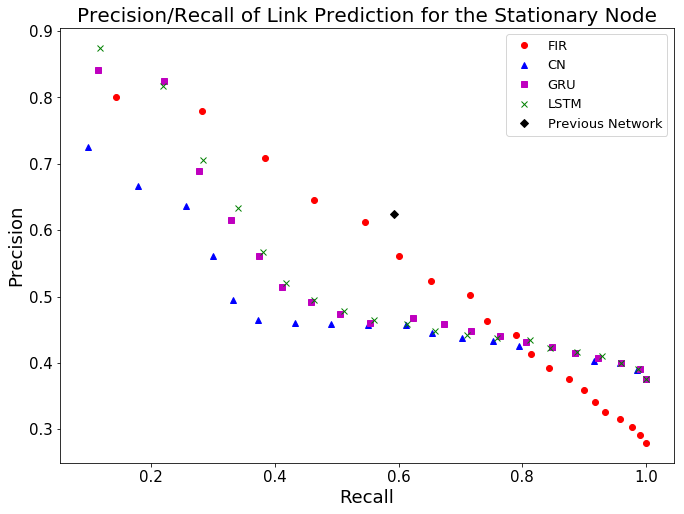

In [8]:
## Plot the results for link prediction (stationary nodes)
fig = plt.figure(figsize=(11,8))
# ax = fig.add_subplot(111)
# ax.grid()
precision_models, recall_models = list(), list()
legend_label = ['FIR', 'CN', 'GRU', 'LSTM']
fmt = ['ro', 'b^', 'ms', 'gx']
for i, model in enumerate(models):
    with open(path+'Precision_stationary_{}.txt'.format(model)) as f:
        precision = list()
        data = f.readlines()
        for line in data:
            precision.append(text_to_list(line))
        pre_ = np.array(precision)
#         print(pre_.shape)
        precision_models.append(np.mean(pre_, axis=0, dtype=np.float64))
#     print(precision_models[-1])

    with open(path+'Recall_stationary_{}.txt'.format(model)) as f:
        recall = list()
        data = f.readlines()
        for line in data:
            recall.append(text_to_list(line))
        rec_ = np.array(recall)
#         print(rec_.shape)
        recall_models.append(np.mean(rec_, axis=0, dtype=np.float64))
#     print(recall_models[-1])

    plt.plot(recall_models[-1], precision_models[-1], fmt[i], label=legend_label[i])
plt.plot(recall_p, precision_p, 'kD', label='Previous Network')
plt.legend(fontsize=13)
plt.title('Precision/Recall of Link Prediction for the Stationary Node', fontsize=20)
plt.ylabel('Precision', fontsize=18)
plt.xlabel('Recall', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(path+'link_prediction_stationary.png')
plt.show()

In [9]:
## precision/recall of link prediction by previous network
with open(path+'Precision_moving_Previous.txt') as f:
	precision_p = 0
	data = f.readlines()
	for line in data:
		precision_p += float(line)
	precision_p /= len(data)
with open(path+'Recall_moving_Previous.txt') as f:
	recall_p = 0
	data = f.readlines()
	for line in data:
		recall_p += float(line)
	recall_p /= len(data)

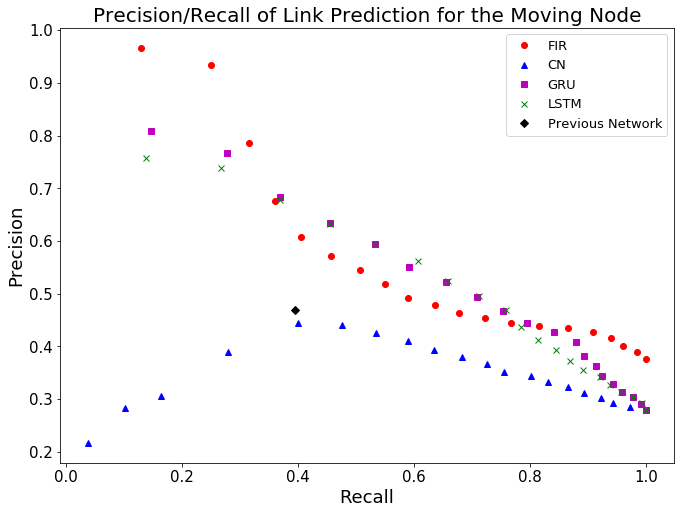

In [10]:
## Plot the results for link prediction (moving nodes)
fig = plt.figure(figsize=(11,8))
# ax = fig.add_subplot(111)
# ax.grid()
precision_models, recall_models = list(), list()
legend_label = ['FIR', 'CN', 'GRU', 'LSTM']
fmt = ['ro', 'b^', 'ms', 'gx']
for i, model in enumerate(models):
    with open(path+'Precision_moving_{}.txt'.format(model)) as f:
        precision = list()
        data = f.readlines()
        for line in data:
            precision.append(text_to_list(line))
        pre_ = np.array(precision)
#         print(pre_.shape)
        precision_models.append(np.mean(pre_, axis=0, dtype=np.float64))
#     print(precision_models[-1])

    with open(path+'Recall_moving_{}.txt'.format(model)) as f:
        recall = list()
        data = f.readlines()
        for line in data:
            recall.append(text_to_list(line))
        rec_ = np.array(recall)
#         print(rec_.shape)
        recall_models.append(np.mean(rec_, axis=0, dtype=np.float64))
#     print(recall_models[-1])

    plt.plot(recall_models[-1], precision_models[-1], fmt[i], label=legend_label[i])
plt.plot(recall_p, precision_p, 'kD', label='Previous Network')
plt.legend(fontsize=13)
plt.title('Precision/Recall of Link Prediction for the Moving Node', fontsize=20)
plt.ylabel('Precision', fontsize=18)
plt.xlabel('Recall', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(path+'link_prediction_moving.png')
plt.show()